In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np
import os
import seaborn as sn
from collections import defaultdict
from matplotlib import cm
import matplotlib as mpl
mpl.style.use('classic')
import os.path, time

In [2]:
#new experiments

path = "path" #provide path where results are stored, example: "/FourRoomOption"
folder_name = "CartPoleOption"

path = os.path.join(path, folder_name)

dirs = os.listdir(path)
file_names_to_read_i = []
for dir_name in dirs:
    if (dir_name.startswith("R") and "E2000" in dir_name):
        files = os.listdir(os.path.join(path, dir_name))
        if "History.npy" in files:
            file_names_to_read_i.append(dir_name)
            
final_rewards =[]
final_steps = []
betas=["0.0","0.25","0.3"]
episode =1000
file_names_to_read= []
name_to_index= {}
cur_index_dict = 0
final_nanes =[]
for i in range(len(betas)):
    
    for fi in file_names_to_read_i:  
        if "Beta"+str(betas[i])+"_" in fi:
            name_elements = fi.split("_seed")
            start_name = name_elements[0].split("_Beta")[1]
            start_name = "Beta"+start_name
            if start_name not in file_names_to_read:
                name_to_index[start_name] = cur_index_dict
                
                file_names_to_read.append(start_name)
                cur_index_dict+=1
for i in range(len(file_names_to_read)):
    flag = 0
    curr_reward = []
    curr_steps=[]
    for fi in file_names_to_read_i:
        
        name_elements = fi.split("_seed")
        start_name = name_elements[0].split("_Beta")[1]
        start_name = "Beta"+start_name
        if start_name in file_names_to_read[i]:
            filename_reward = os.path.join(path,fi, "History.npy")
            data = np.load(filename_reward)[:,:episode,:]
            curr_reward.extend(data[:,:,1])
            curr_steps.extend(data[:,:,0])
    reward = np.array(curr_reward)
    step = np.array(curr_steps)
    averaged_reward = np.mean(reward, axis = 0)
    variance_reward = np.std(reward, axis = 0)
    
    averaged_step = np.mean(step, axis = 0)
    variance_step = np.std(step, axis = 0)
    data_reward = np.vstack((averaged_reward, variance_reward))
    data_steps = np.vstack((averaged_step, variance_step))
    final_rewards.append(data_reward)
    final_steps.append(data_steps)

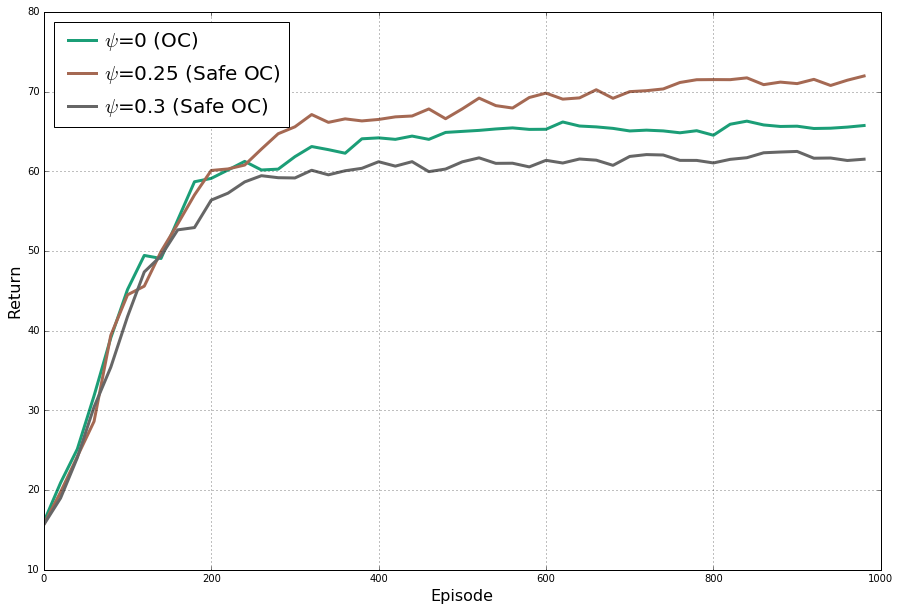

In [3]:
"""
Return for Cartpole Env
"""
fig, ax = plt.subplots(figsize=(15, 10))
start = 0.0
stop = 1.0
number_of_lines= len(file_names_to_read)
cm_subsection = np.linspace(start, stop, number_of_lines)
colors = [ cm.Dark2(x) for x in cm_subsection ]
labels_write=["0 (OC)","0.25 (Safe OC)","0.3 (Safe OC)"]
color_count = 0

start_from= 0
end_to = 1000
for k in range(len(file_names_to_read)):
    
    reward = final_rewards[k][0][start_from:end_to]
    reward_std = final_rewards[k][1][start_from:end_to]

    window = 20
    length = int(reward.shape[0]/ window)
    new_reward = np.zeros(length)
    new_reward_std = np.zeros(length)
    x_axis = []

    for i in range(length):
        new_reward[i] = np.mean(reward[i*window : i*window + window])
        new_reward_std[i] = np.mean(reward_std[i*window : i*window + window])
        x_axis.append(start_from+i*window)

    mean_std_dev = np.mean(new_reward_std)
    error =new_reward_std
    name = file_names_to_read[k]
    linestyle="-"

    plt.plot(x_axis, new_reward, color = colors[color_count], lw=1, label ="$\psi$="+labels_write[k] , linewidth = 3, linestyle = linestyle)            
    color_count +=1

plt.xlabel("Episode", fontsize=16)
plt.ylabel("Return",fontsize=16)
ax.grid()
plt.legend(prop={'size': 20}, loc=0, handletextpad=0.1)
plt.show()
plt.close()